In [1]:
!git clone https://github.com/germanpadua/GCN-Pseudo-Riemannian-Manifold

Cloning into 'GCN-Pseudo-Riemannian-Manifold'...
remote: Enumerating objects: 486, done.
remote: Counting objects: 100% (486/486), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 486 (delta 245), reused 481 (delta 242), pack-reused 0
Receiving objects: 100% (486/486), 2.47 MiB | 2.80 MiB/s, done.
Resolving deltas: 100% (245/245), done.


In [2]:
!pip install networkx==2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch

In [3]:
%cd GCN-Pseudo-Riemannian-Manifold

/content/GCN-Pseudo-Riemannian-Manifold


In [4]:
import os

os.environ['LOG_DIR'] = '/content/logs'

In [5]:
os.environ['DATAPATH'] = '/content/GCN-Pseudo-Riemannian-Manifold/data'

He cambiado np.int a int, ya que en numpy ya no se utiliza np.int

In [6]:
!python train.py -h

usage: train.py [-h] [--lr LR] [--dropout DROPOUT] [--cuda CUDA] [--epochs EPOCHS]
                [--weight-decay WEIGHT_DECAY] [--optimizer OPTIMIZER] [--momentum MOMENTUM]
                [--patience PATIENCE] [--seed SEED] [--log-freq LOG_FREQ] [--eval-freq EVAL_FREQ]
                [--save SAVE] [--save-dir SAVE_DIR] [--sweep-c SWEEP_C]
                [--lr-reduce-freq LR_REDUCE_FREQ] [--gamma GAMMA] [--print-epoch PRINT_EPOCH]
                [--grad-clip GRAD_CLIP] [--min-epochs MIN_EPOCHS] [--task TASK] [--model MODEL]
                [--dim DIM] [--manifold MANIFOLD] [--c C] [--r R] [--t T]
                [--pretrained-embeddings PRETRAINED_EMBEDDINGS] [--pos-weight POS_WEIGHT]
                [--num-layers NUM_LAYERS] [--bias BIAS] [--act ACT] [--n-heads N_HEADS]
                [--alpha ALPHA] [--double-precision DOUBLE_PRECISION] [--use-att USE_ATT]
                [--local-agg LOCAL_AGG] [--space_dim SPACE_DIM] [--time_dim TIME_DIM]
                [--dataset DATASET] [

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

In [7]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'


In [8]:
!python train.py --cuda -1

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:618.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 7
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1433, output_dim=128
        (linear): Linear(in_features=1433, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, output_dim=7
      (linear): Linear(in_features=128, out_features=7, bias=True)
    )
  )
)
INFO:root:Total number of parameters: 184455
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:402: UserWarning: To get the last learning rate computed by the schedu

In [9]:
!python train.py --task lp --dataset cora --cuda -1 --act None

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:618.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1433, output_dim=128
        (linear): Linear(in_features=1433, out_features=128, bias=True)
      )
      (1): GraphConvolution(
        input_dim=128, output_dim=128
        (linear): Linear(in_features=128, out_features=128, bias=True)
      )
    )
  )
  (dc): FermiDiracDecoder()
)
INFO:root:Total number of parameters: 200064
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:402: UserWarning: To get the last learning rate computed by the scheduler, please use 

In [ ]:
!python train.py --task nc --dataset cora --cuda -1

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 7
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1433, output_dim=128
        (linear): Linear(in_features=1433, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, output_dim=7
      (linear): Linear(in_features=128, out_features=7, bias=True)
    )
  )
)
INFO:root:Total number of parameters: 184455
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:384: UserWarning: To get the last learning rate computed by the schedu

In [11]:
!python train.py --dataset power --task md --cuda 0 --act None

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:618.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:MDModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=4941, output_dim=128
        (linear): Linear(in_features=4941, out_features=128, bias=True)
      )
    )
  )
  (decoder): MDDecoder()
)
INFO:root:Total number of parameters: 632576
Traceback (most recent call last):
  File "/content/GCN-Pseudo-Riemannian-Manifold/train.py", line 167, in <module>
    train(args)
  File "/content/GCN-Pseudo-Riemannian-Manifold/train.py", line 112, in train
    train_metrics = model.compute_metrics(embeddings, data, 'train')
  File "/content/GCN-

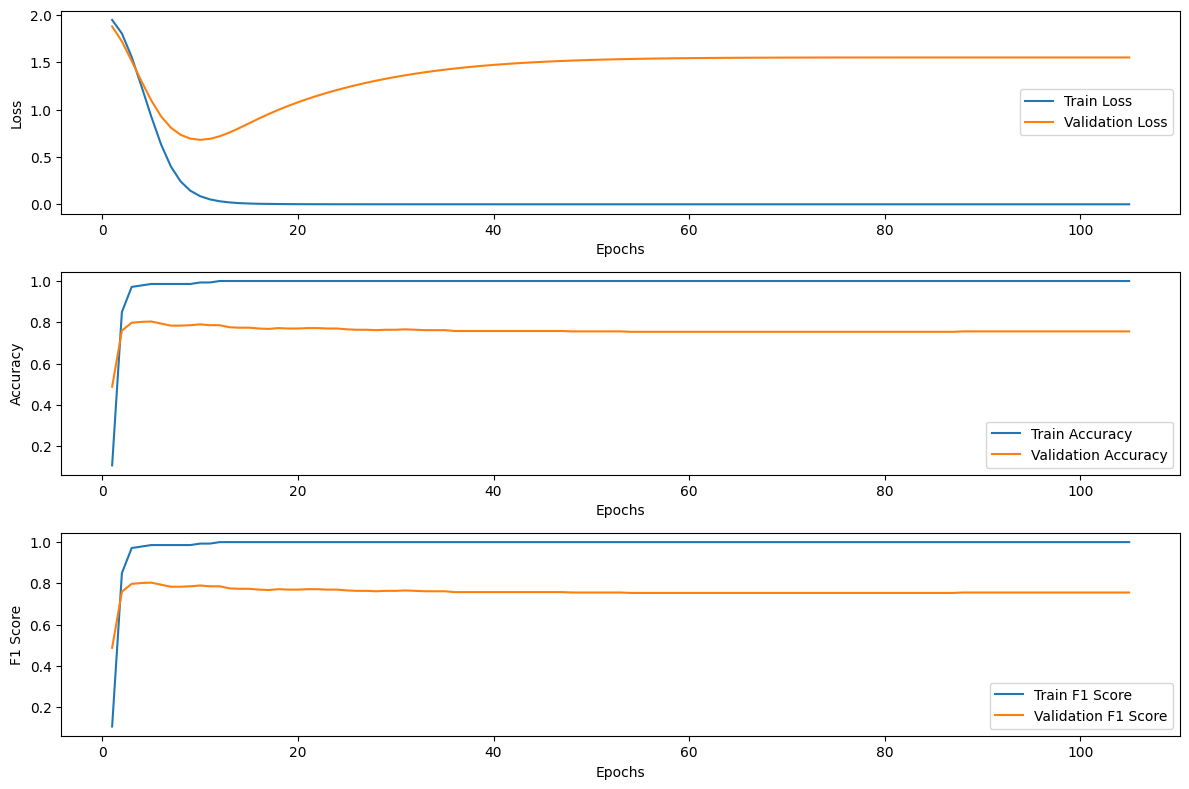

In [13]:
import matplotlib.pyplot as plt
import re

# Inicializar listas para almacenar los datos extraídos
epochs = []
train_loss = []
train_acc = []
train_f1 = []
val_epochs = []  # Lista separada para épocas de validación
val_loss = []
val_acc = []
val_f1 = []

# Leer el archivo de log
with open('/content/logs/nc/2024_3_18/0/log.txt', 'r') as file:
    for line in file:
        # Extraer información de las épocas de entrenamiento
        if "Epoch:" in line and "val_loss:" not in line:
            epoch_info = re.findall(r"Epoch: (\d+).*lr: ([\d.]+).*train_loss: ([\d.]+).*train_acc: ([\d.]+).*train_f1: ([\d.]+).*time: ([\d.]+)s", line)
            if epoch_info:
                epochs.append(int(epoch_info[0][0]))
                train_loss.append(float(epoch_info[0][2]))
                train_acc.append(float(epoch_info[0][3]))
                train_f1.append(float(epoch_info[0][4]))
        # Extraer y alinear la información de validación con las épocas correspondientes
        elif "val_loss:" in line:
            val_info = re.findall(r"Epoch: (\d+).*val_loss: ([\d.]+) val_acc: ([\d.]+) val_f1: ([\d.]+)", line)
            if val_info:
                val_epochs.append(int(val_info[0][0]))  # Asegurar alineación con las épocas de entrenamiento
                val_loss.append(float(val_info[0][1]))
                val_acc.append(float(val_info[0][2]))
                val_f1.append(float(val_info[0][3]))

# Asegúrate de que las épocas de entrenamiento y validación se alineen
assert epochs == val_epochs, "Las listas de épocas de entrenamiento y validación no coinciden."

# Crear gráficos
plt.figure(figsize=(12, 8))

# Gráfico de pérdida
plt.subplot(3, 1, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión
plt.subplot(3, 1, 2)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de puntuación F1
plt.subplot(3, 1, 3)
plt.plot(epochs, train_f1, label='Train F1 Score')
plt.plot(epochs, val_f1, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Inicializar variables para almacenar los resultados finales
val_loss = val_acc = val_f1 = test_loss = test_acc = test_f1 = None

# Leer el archivo de log
with open('/content/logs/nc/2024_3_18/0/log.txt', 'r') as file:
    log_text = file.read()

    #Buscar el tiempo de ejecución
    time_result = re.search(r"INFO:root:Total time elapsed: ([\d.]+)", log_text)
    if time_result:
        time_total,  = time_result.groups()
    # Buscar los resultados de validación
    val_results = re.search(r"Val set results: val_loss: ([\d.]+) val_acc: ([\d.]+) val_f1: ([\d.]+)", log_text)
    if val_results:
        val_loss, val_acc, val_f1 = val_results.groups()

    # Buscar los resultados de test
    test_results = re.search(r"Test set results: test_loss: ([\d.]+) test_acc: ([\d.]+) test_f1: ([\d.]+)", log_text)
    if test_results:
        test_loss, test_acc, test_f1 = test_results.groups()

# Imprimir los resultados
print(f"Resultados del conjunto de validación:")
print(f"- Pérdida (Loss): {val_loss}")
print(f"- Precisión (Accuracy): {val_acc}")
print(f"- Puntuación F1 (F1 Score): {val_f1}\n")

print(f"Resultados del conjunto de prueba:")
print(f"- Pérdida (Loss): {test_loss}")
print(f"- Precisión (Accuracy): {test_acc}")
print(f"- Puntuación F1 (F1 Score): {test_f1}")
print(f"Tiempo total de ejecución: {time_total}s")

Resultados del conjunto de validación:
- Pérdida (Loss): 1.0975
- Precisión (Accuracy): 0.8040
- Puntuación F1 (F1 Score): 0.8040

Resultados del conjunto de prueba:
- Pérdida (Loss): 1.0693
- Precisión (Accuracy): 0.8130
- Puntuación F1 (F1 Score): 0.8130
Tiempo total de ejecución: 6.6051s
